In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


In [2]:
import os
import subprocess

import numpy as np
import pandas as pd
import pickle as pkl
import networkx as nx
import gudhi as gh

from src.depth import DepthPoset


#from tqdm.notebook import tqdm
from tqdm import tqdm

from matplotlib import pyplot as plt
from matplotlib import cm
from networkx import draw_networkx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import lines as mlines
from matplotlib.colors import to_rgb

from src import poset_scores, node_scores

import itertools

# Create directory for the pics

In [3]:
pics_path = 'raports/pics/extended torus scores'

if not os.path.exists(pics_path):
    os.makedirs(pics_path)

# Load and Format the Data

In [4]:
# define file paths
directory = "results/scores-on-barycentric-cubical-toruses-extended"
paths = np.sort([f'{directory}/{f}' for f in os.listdir(directory)])
paths = paths[np.char.find(paths, '.pkl') != -1]


In [5]:
df_sizes = pd.DataFrame({'path': paths})
df_sizes['size'] = df_sizes['path'].apply(lambda path: os.path.getsize(path))

print(f"Total Size is {df_sizes['size'].sum()*1024**-3:.4f} GB.")
print(f"The distribution of sizes:\n{df_sizes['size'].describe()}")

Total Size is 0.2311 GB.
The distribution of sizes:
count    7.680000e+02
mean     3.231454e+05
std      5.717787e+05
min      1.830000e+03
25%      8.362500e+03
50%      1.752750e+04
75%      3.381505e+05
max      2.399543e+06
Name: size, dtype: float64


In [6]:

#paths = paths[pd.Series(paths).apply(lambda s: s.split('.')[0].split('/')[-1]).values > '2024-12-26 18:04:00']

# load them
ls = []
for path in tqdm(paths, total=len(paths)):
    with open(path, 'rb') as file:
        ls.append(pkl.load(file))
        ls[-1].update({'path': path})

100%|██████████| 768/768 [00:10<00:00, 72.18it/s] 


In [7]:
def cmap_cud(i):
    cud_colors = np.array(["#000000", "#E69F00", "#56B4E9", "#009E73", 
                           "#F0E442", "#0072B2", "#D55E00", "#CC79A7",])
    return cud_colors[i]

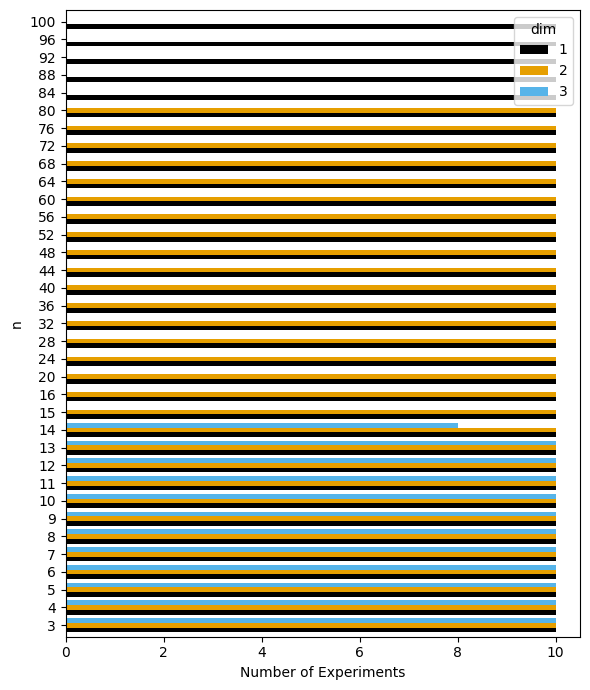

In [8]:
fig, ax = plt.subplots(figsize=(6, 7))

df_cases = pd.DataFrame(ls)
df_cases.insert(0, 'index', df_cases.index)


cmap_categorical = plt.get_cmap('Dark2')
cmap_categorical = plt.get_cmap('Accent')

cmap_categorical = cmap_cud


colors = cmap_categorical(np.arange(df_cases['dim'].nunique()))
#colors = cmap_categorical(pd.unique(df_cases['dim']))

df_cases[['n', 'dim', 'depth poset']].groupby(['n', 'dim']).count().reset_index().pivot(columns='dim', index='n', values='depth poset').fillna(0).astype(int).plot(kind='barh', width=0.8, ax=ax, color=colors)
plt.xlabel('Number of Experiments')
plt.tight_layout()
plt.savefig('raports/pics/extended torus scores/cases.png')

In [9]:
print(f'df_cases.shape = {df_cases.shape}')
df_cases.head()

df_cases.shape = (768, 9)


,index,n,dim,shape,complex,depth poset,poset scores,node scores,path
0,0,9,3,"(9, 9, 9)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x7e358ffa16a0>,"[{'object': 'full', 'cycles_dimension': 1938, ...","[{'object': 'full', 'node': (7, 7, 4),((7,7,4)...",results/scores-on-barycentric-cubical-toruses-...
1,1,9,3,"(9, 9, 9)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x7e358ffa18b0>,"[{'object': 'full', 'cycles_dimension': 1735, ...","[{'object': 'full', 'node': (7, 5, 7),((7,5,7)...",results/scores-on-barycentric-cubical-toruses-...
2,2,9,3,"(9, 9, 9)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x7e358ffa1e20>,"[{'object': 'full', 'cycles_dimension': 1776, ...","[{'object': 'full', 'node': (4, 4, 3),((4,4,3)...",results/scores-on-barycentric-cubical-toruses-...
3,3,9,3,"(9, 9, 9)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x7e358ffa28a0>,"[{'object': 'full', 'cycles_dimension': 1743, ...","[{'object': 'full', 'node': (0, 6, 8),((0,6,8)...",results/scores-on-barycentric-cubical-toruses-...
4,4,9,3,"(9, 9, 9)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x7e358ffa3830>,"[{'object': 'full', 'cycles_dimension': 1956, ...","[{'object': 'full', 'node': (1, 2, 4),((1,2,4)...",results/scores-on-barycentric-cubical-toruses-...


### Listing the cases which are not exactly 10 experiments.

In [10]:
df_cases_not10 = df_cases.groupby(['n', 'dim']).agg({'index': 'count', 'path': list}).rename(columns={'index': 'count'})
df_cases_not10 = df_cases_not10[df_cases_not10['count'] != 10] 
df_cases_not10 = df_cases_not10.explode('path').sort_values('path').reset_index()
df_cases_not10

,n,dim,count,path
0,14,3,8,results/scores-on-barycentric-cubical-toruses-...
1,14,3,8,results/scores-on-barycentric-cubical-toruses-...
2,14,3,8,results/scores-on-barycentric-cubical-toruses-...
3,14,3,8,results/scores-on-barycentric-cubical-toruses-...
4,14,3,8,results/scores-on-barycentric-cubical-toruses-...
5,14,3,8,results/scores-on-barycentric-cubical-toruses-...
6,14,3,8,results/scores-on-barycentric-cubical-toruses-...
7,14,3,8,results/scores-on-barycentric-cubical-toruses-...


In [11]:
print('\n'.join(df_cases_not10['path'].apply(lambda s: f'rm "{s}"')))

rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 01:32:38.674315.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 03:58:50.730685.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 09:07:55.626817.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 11:03:42.848195.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 11:50:17.030032.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 12:16:14.108007.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 14:55:44.494420.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-18 15:52:26.628492.pkl"


## Removeing cases from dataframe

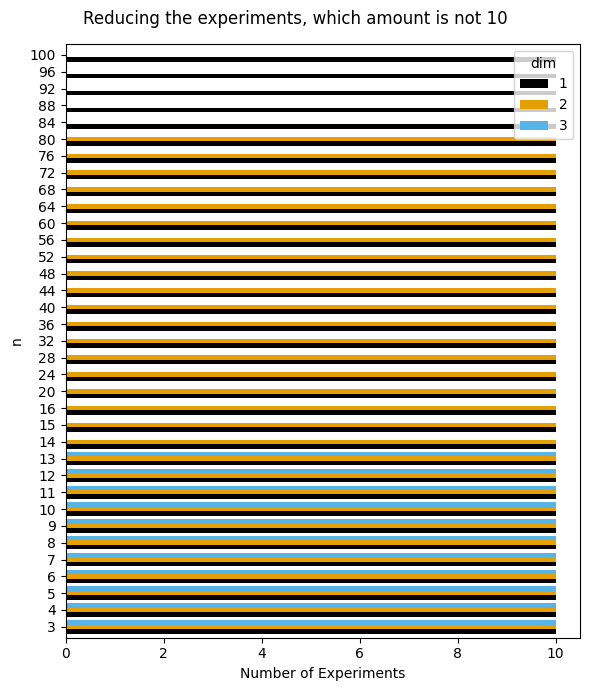

In [12]:
expected_count = 10

cases_count = df_cases.groupby(['n', 'dim']).agg({'index': 'count', 'path': list}).rename(columns={'index': 'count'})['count']

wrong_ndims = cases_count[cases_count != expected_count].index.to_list()#reset_index(drop=False)[['n', 'dim']]

for n, dim in wrong_ndims:
    df_cases = df_cases[~((df_cases['n'] == n) & (df_cases['dim'] == dim))]

fig, ax = plt.subplots(figsize=(6, 7))

fig.suptitle(f'Reducing the experiments, which amount is not {expected_count}')

df_cases[['n', 'dim', 'depth poset']].groupby(['n', 'dim']).count().reset_index().pivot(columns='dim', index='n', values='depth poset').fillna(0).astype(int).plot(kind='barh', width=0.8, ax=ax, color=colors)
plt.xlabel('Number of Experiments')
plt.tight_layout()
plt.savefig('raports/pics/extended torus scores/cases.png')

# The example of the filtration $f: \mathbb{T}^2\to\mathbb{R}$

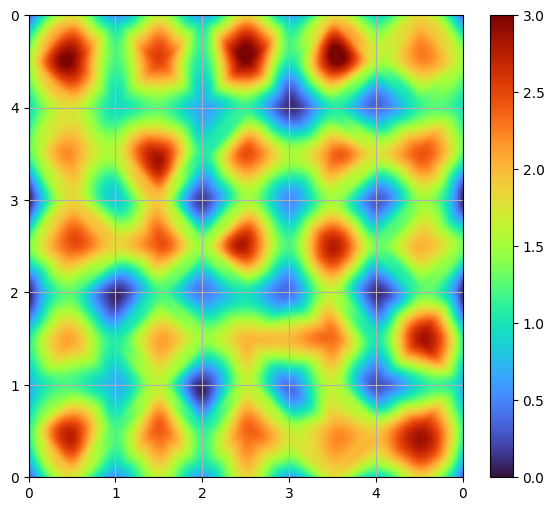

In [13]:
try:
    ctc = np.random.choice(df_cases[(df_cases['dim'] == 2)&(df_cases['n'] <= 6)]['complex'])
except ValueError:
    ctc = np.random.choice(df_cases[(df_cases['dim'] == 2)]['complex'])
    
n = ctc.shape[0]

fig, ax = plt.subplots(figsize=(7, 6))

sm = ctc.draw_gradiental(ax=ax, vmin=0, vmax=3, cmap='turbo')
plt.colorbar(sm, ax=ax)

ax.set_xticks(np.arange(n + 1), np.arange(n + 1)%n)
ax.set_yticks(np.arange(n + 1), np.arange(n + 1)%n)
ax.grid(True)

example_path = os.path.join(pics_path, '2d-example.png')

plt.savefig(example_path)

# Plot Poset Scores

## Define Scores and Objects Distribution

In [14]:
def get_object_reduction(s):
    if s.find('row reduction') == 0:
        return 'row reduction'
    elif s.find('column reduction') == 0:
        return 'column reduction'
    else:
        return 'full'

In [15]:
df_scores = df_cases[['index', 'n', 'dim', 'poset scores']]
df_scores = df_scores.explode('poset scores')
df_scores = pd.concat([df_scores.drop(columns='poset scores'), df_scores['poset scores'].apply(pd.Series)], axis=1)
df_scores['reduction'] = df_scores['object'].apply(get_object_reduction)

print(f'df_scores.shape = {df_scores.shape}')
df_scores.head()

df_scores.shape = (6120, 12)


,index,n,dim,object,cycles_dimension,height,number_of_nodes,number_of_relations,number_of_components,number_of_maximal_nodes,number_of_minimal_nodes,reduction
0,0,9,3,full,1938.0,26.0,2916.0,4734.0,NaN,NaN,NaN,full
0,0,9,3,subposet dim=0,129.0,9.0,728.0,798.0,NaN,NaN,NaN,full
0,0,9,3,subposet dim=1,1689.0,26.0,1458.0,3139.0,NaN,NaN,NaN,full
0,0,9,3,subposet dim=2,120.0,11.0,728.0,797.0,NaN,NaN,NaN,full
0,0,9,3,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction


In [16]:
df_scores[df_scores['object'] == 'column reduction']

,index,n,dim,object,cycles_dimension,height,number_of_nodes,number_of_relations,number_of_components,number_of_maximal_nodes,number_of_minimal_nodes,reduction
0,0,9,3,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
1,1,9,3,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
2,2,9,3,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
3,3,9,3,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
4,4,9,3,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
...,...,...,...,...,...,...,...,...,...,...,...,...
761,761,11,2,column reduction,NaN,NaN,NaN,NaN,48.0,60.0,145.0,column reduction
762,762,11,2,column reduction,NaN,NaN,NaN,NaN,49.0,69.0,149.0,column reduction
763,763,11,2,column reduction,NaN,NaN,NaN,NaN,44.0,58.0,150.0,column reduction
764,764,11,2,column reduction,NaN,NaN,NaN,NaN,64.0,76.0,144.0,column reduction


In [17]:
df_done_scores = df_scores.groupby(['dim', 'reduction']).count().drop(columns=['index', 'n', 'object']) > 0
df_done_scores = df_done_scores.loc[itertools.product(df_cases['dim'].unique(), ['full', 'row reduction', 'column reduction'])]
df_done_scores

cycles_dimension  height  number_of_nodes  \
dim reduction                                                     
3   full                          True    True             True   
    row reduction                False   False            False   
    column reduction             False   False            False   
1   full                          True    True             True   
    row reduction                False   False            False   
    column reduction             False   False            False   
2   full                          True    True             True   
    row reduction                False   False            False   
    column reduction             False   False            False   

                      number_of_relations  number_of_components  \
dim reduction                                                     
3   full                             True                 False   
    row reduction                   False                 False   
    column reduction                False                 False   
1   full                             True                 False   
    row reduction                   False                 False   
    column reduction                False                 False   
2   full                             True                  True   
    row reduction                   False                  True   
    column reduction                False                  True   

                      number_of_maximal_nodes  number_of_minimal_nodes  
dim reduction                                                           
3   full                                False                    False  
    row reduction                       False                    False  
    column reduction                    False                    False  
1   full                                False                    False  
    row reduction                       False                    False  
    column reduction                    False                    False  
2   full                                 True                     True  
    row reduction                        True                     True  
    column reduction                     True                     True

## Plot scores

In [18]:
df_objects_scores = df_done_scores.stack()
df_objects_scores = df_objects_scores[df_objects_scores].index.to_series().reset_index(drop=False).drop(columns=0).rename(columns={'level_2': 'score'})
df_objects_scores = df_objects_scores.sort_values('score').reset_index(drop=True)

print(f'There are {len(df_objects_scores)} score object pairs to plot')
df_objects_scores.head()

There are 21 score object pairs to plot


,dim,reduction,score
0,3,full,cycles_dimension
1,1,full,cycles_dimension
2,2,full,cycles_dimension
3,3,full,height
4,1,full,height


In [19]:
def get_score_path(score, dim, reduction, score_filename_template='score={score}, dim={dim}, object={reduction}.png'):
    # returns path to saved and load a picture about the object
    return os.path.join(pics_path, score_filename_template.format(score=score, dim=dim, reduction=reduction).replace('_', '-'))

In [20]:
def relabel(label):
    # returns the well label for the subposet opbject
    if label == 'full':
        return 'Depth poset'
    if label == 'column reduction':
        return 'Death relation'
    if label == 'row reduction':
        return 'Birth relation'
    if any(char.isdigit() for char in label):
        label = ''.join([char for char in label if char.isdigit()])
        label = f'$p = {label}$'
        return label
    return 'Poset'

In [21]:
score_rename_dict = {
    'cycles_dimension': '#direct cycles', 
    'height': 'height', 
    'number_of_components': '#components',
    'number_of_maximal_nodes': '#maximal nodes', 
    'number_of_minimal_nodes': '#minimal nodes', 
    'number_of_nodes': '#nodes', 
    'number_of_relations': '#arcs', 
}

100%|██████████| 21/21 [00:02<00:00,  8.03it/s]


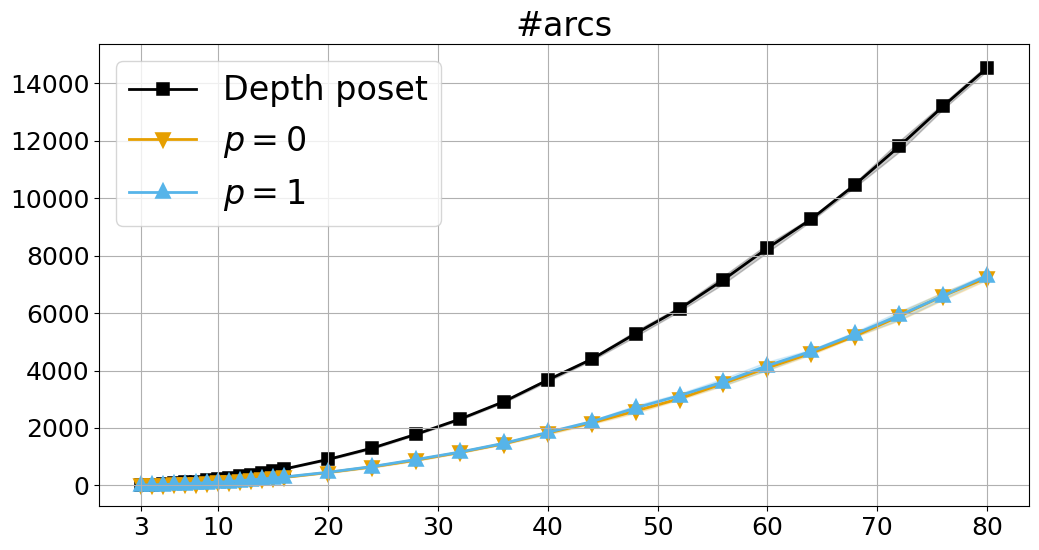

In [22]:
markers = ['s', 'v', '^', 'o', '*']


for i, row in tqdm(df_objects_scores.iterrows(), total=len(df_objects_scores)):
    path = get_score_path(**row)
    
    score = row['score']

    df_score = df_scores[(df_scores['dim'] == row['dim']) & (df_scores['reduction'] == row['reduction'])][['index', 'n', 'object', score]]
    df_score = df_score.pivot_table(index=['n', 'index'], columns='object', values=score).reset_index(drop=False).drop(columns='index')

    df_score_mean = df_score.groupby('n').mean()
    df_score_std = df_score.groupby('n').std()

    colors = cmap_categorical(np.arange(df_score_mean.shape[1]))
    
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.set_title(score_rename_dict[score], fontsize=24)

    for i_col, col in enumerate(df_score_mean.columns):
        linewidth = 2
        markeredgewidth = 4
        x_mean = df_score_mean.index
        y_mean = df_score_mean[col]
        y_std = df_score_std[col]
        ax.plot(x_mean, y_mean, label=relabel(col), color=colors[i_col], marker=markers[i_col], linewidth=linewidth, markeredgewidth=markeredgewidth, zorder=1)
        ax.fill_between(x_mean, y_mean - y_std, y_mean + y_std, color=colors[i_col], alpha=0.2, zorder=0)

    xticks = ax.get_xticks().astype(int)
    xticks = np.concatenate([xticks[(xticks > x_mean.min())&(xticks < x_mean.max())], [x_mean.min(), x_mean.max()]]).astype(int)
    xticks = np.unique(xticks)
    ax.set_xticks(xticks)
    ax.set_xticklabels(ax.get_xticks(), fontsize=18)
    
    yticks = ax.get_yticks()
    if (yticks.astype(int) == yticks).all():
        yticks = yticks.astype(int)
    y_max = (df_score_mean + df_score_std).max().max()
    while (y_max < 0.5*(yticks[-1] + yticks[-2])) and (len(yticks) > 4):
        yticks = yticks[:-1]
    yticks = yticks[yticks >= 0]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=18) 

    ax.legend(fontsize=24)
    #ax.set_xlabel('n')    
    #ax.set_ylabel(score)
    ax.grid(True)

    plt.savefig(path)

    if i < len(df_objects_scores) - 1:
        plt.close()

#plt.suptitle(f"{row['reduction']} poset of $\mathbb{{T\;}}_n^{{{row['dim']}}}$\n{score}")
#plt.tight_layout()
plt.show()

# Reporting

## Scores

### Scores Description

In [23]:
def latexize_the_score(score):
    return score.replace('_', r'\_')

In [24]:
ltx_scores_description = [
    f"""
    \\item \\textbf{{{latexize_the_score(score)}}} - {getattr(poset_scores, score).__doc__.strip()}
    """.strip()
    for score in df_objects_scores['score'].unique()
]
ltx_scores_description = '\n'.join(ltx_scores_description)
ltx_scores_description = f"""
\\par We have computed the following scores for the objects in the depth poset of the extended barycentric cubical torus:
\\begin{{itemize}}
{ltx_scores_description}
\\end{{itemize}}
""".strip()

#print(ltx_scores_description)

## Scores Table

In [25]:
def get_score_label(score, dim, reduction, score_label_template='{score}-{reduction}{dim}'):
    # returns label to saved and load a picture about the object
    return 'fig:' + score_label_template.format(score=score, dim=dim, reduction=reduction).replace('_', '').replace(' ', '')

In [26]:
df_done_scores_pics = pd.DataFrame(
    [[f'Fig. \\ref{{{get_score_label(score, dim, reduction)}}}' for score in df_done_scores.columns] for dim, reduction in df_done_scores.index],
    index=df_done_scores.index,
    columns=df_done_scores.columns
)
df_done_scores_pics[~df_done_scores] = np.nan
df_done_scores_pics = df_done_scores_pics.dropna(how='all').fillna('')
df_done_scores_pics.columns = df_done_scores_pics.columns.str.replace('_', r'\_')

df_done_scores_pics = df_done_scores_pics.transpose()

df_done_scores_pics

dim                                                              3  \
reduction                                                     full   
cycles\_dimension             Fig. \ref{fig:cyclesdimension-full3}   
height                                 Fig. \ref{fig:height-full3}   
number\_of\_nodes               Fig. \ref{fig:numberofnodes-full3}   
number\_of\_relations       Fig. \ref{fig:numberofrelations-full3}   
number\_of\_components                                               
number\_of\_maximal\_nodes                                           
number\_of\_minimal\_nodes                                           

dim                                                              1  \
reduction                                                     full   
cycles\_dimension             Fig. \ref{fig:cyclesdimension-full1}   
height                                 Fig. \ref{fig:height-full1}   
number\_of\_nodes               Fig. \ref{fig:numberofnodes-full1}   
number\_of\_relations       Fig. \ref{fig:numberofrelations-full1}   
number\_of\_components                                               
number\_of\_maximal\_nodes                                           
number\_of\_minimal\_nodes                                           

dim                                                                 2  \
reduction                                                        full   
cycles\_dimension                Fig. \ref{fig:cyclesdimension-full2}   
height                                    Fig. \ref{fig:height-full2}   
number\_of\_nodes                  Fig. \ref{fig:numberofnodes-full2}   
number\_of\_relations          Fig. \ref{fig:numberofrelations-full2}   
number\_of\_components        Fig. \ref{fig:numberofcomponents-full2}   
number\_of\_maximal\_nodes  Fig. \ref{fig:numberofmaximalnodes-full2}   
number\_of\_minimal\_nodes  Fig. \ref{fig:numberofminimalnodes-full2}   

dim                                                                            \
reduction                                                       row reduction   
cycles\_dimension                                                               
height                                                                          
number\_of\_nodes                                                               
number\_of\_relations                                                           
number\_of\_components        Fig. \ref{fig:numberofcomponents-rowreduction2}   
number\_of\_maximal\_nodes  Fig. \ref{fig:numberofmaximalnodes-rowreduction2}   
number\_of\_minimal\_nodes  Fig. \ref{fig:numberofminimalnodes-rowreduction2}   

dim                                                                            
reduction                                                    column reduction  
cycles\_dimension                                                              
height                                                                         
number\_of\_nodes                                                              
number\_of\_relations                                                          
number\_of\_components      Fig. \ref{fig:numberofcomponents-columnreducti...  
number\_of\_maximal\_nodes  Fig. \ref{fig:numberofmaximalnodes-columnreduc...  
number\_of\_minimal\_nodes  Fig. \ref{fig:numberofminimalnodes-columnreduc...

In [27]:
ltx_scores_table = f"""
\\par We can see the score values in the following figures:
\\begin{{center}}
{df_done_scores_pics.to_latex()}
\\end{{center}}
""".strip()

#print(ltx_scores_table)

### Score pics

In [28]:
hspace_width = -0.24
width = 1.4

ltx_score_pics = [
    ' '*4 + f"""
    \\begin{{figure}}[h!]
        \\centering
        \\hspace*{{{hspace_width}\\textwidth}}
        \\includegraphics[width={width}\\textwidth]{{{get_score_path(**row).replace('raports/', '')}}}
        \\caption{{Score {latexize_the_score(row['score'])} values for the {row['reduction']} poset of $\\mathbb{{T}}_n^{{{row['dim']}}}$.}}
        \\label{{{get_score_label(**row)}}}
    \\end{{figure}}
    """.strip() for i, row in df_objects_scores.iterrows()
]

ltx_score_pics = '\n'.join(ltx_score_pics)
#print(ltx_score_pics)

## Cases distribution

In [29]:
ltx_cases = r"""
\par The distribution of computed cases by size and dimension we can see in the Fig. \ref{fig:cases-distribution}.
\begin{figure}[h!]
    \centering
    \includegraphics[width=1.0\textwidth]{pics/extended torus scores/cases.png}
    \caption{The distribution of computed cases by size and dimension}
    \label{fig:cases-distribution}
\end{figure}
""".strip()

## Load texts

In [30]:
# load texts, describing the process
with open('texts/barycentric-cubical-torus - model.txt', 'r') as file:
    ltx_model = file.read()

with open('texts/barycentric-cubical-torus - model extension.txt', 'r') as file:
    ltx_model_ext = file.read()

# load LaTeX template
with open('texts/template.tex', 'r') as file:
    ltx_latex = file.read()

In [31]:
ltx_model = ltx_model.replace('TORUSEXAMPLEPATH', example_path.replace('raports/', ''))
#print(ltx_model)

In [32]:
body = f"""
\\section{{Model}}
{ltx_model}
{ltx_model_ext}
{ltx_cases}

\\section{{Poset Scores}}
\\subsection{{Scores Description}}
{ltx_scores_description}
\\subsection{{Scores}}
{ltx_scores_table}
{ltx_score_pics}
"""


raport = ltx_latex.replace('BODY', body)
#print(raport)

In [33]:
with open('raports/barycentric-torus-extended-scores.tex', 'w') as file:
    file.write(raport)

In [34]:
os.chdir('raports')
result = subprocess.run(
    ['pdflatex', 'barycentric-torus-extended-scores.tex'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True  # или encoding='utf-8'
)
os.chdir('..')
